## Naive Implementation Entropy/Move

In [1]:
import statistics
import matplotlib.pyplot as plt
import pickle
import math
import scipy
import scipy.stats
import numpy as np

In [37]:
with open("results") as f:
    s = [float(x.rstrip()) for x in list(f) if x.rstrip()]; print("Mean", statistics.mean(s)); print("Std", statistics.stdev(s))

Mean 5.951574479203038
Std 4.170969441737926


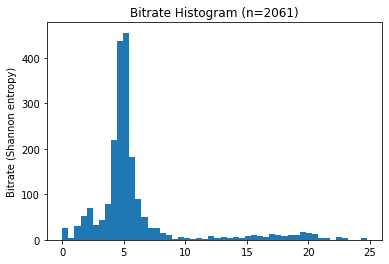

In [38]:
plt.hist(s, bins=50)
plt.gca().set(title=f"Bitrate Histogram (n={len(s)})", ylabel='Bitrate (Shannon entropy)');

## Distribution Plot

In [2]:
with open("../models/distribution.pickle", "rb") as f:
    true_probs, false_probs = pickle.load(f)
elo = 0

1596.3903389081152


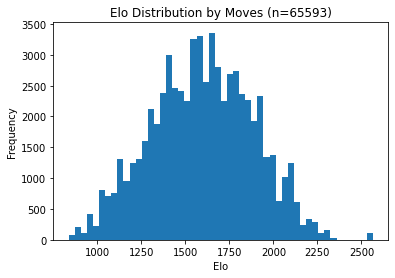

In [3]:
elo_dist = [float(statistics.mean((int(blackelo), int(whiteelo)))) for x, result, blackelo, whiteelo in true_probs if statistics.mean((int(blackelo), int(whiteelo))) > 0]
print(statistics.mean(elo_dist))
plt.hist(elo_dist, bins=50)
plt.gca().set(title=f"Elo Distribution by Moves (n={len(elo_dist)})", ylabel='Frequency', xlabel="Elo");

In [4]:
dist = 10

0.024076441034484607 4.197312767791496


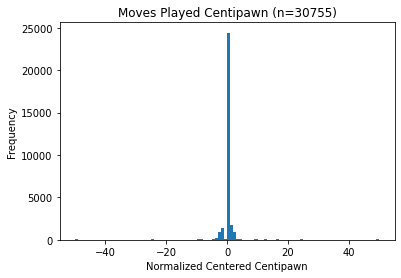

In [5]:
true_probs_dist = [float(x)*100 for x, result, blackelo, whiteelo in true_probs if result == "1-0" and statistics.mean((int(blackelo), int(whiteelo))) > dist]
plt.hist(true_probs_dist, bins=100)
plt.gca().set(title=f"Moves Played Centipawn (n={len(true_probs_dist)})", ylabel='Frequency', xlabel="Normalized Centered Centipawn");
print(statistics.mean(true_probs_dist), statistics.stdev(true_probs_dist))

In [ ]:
false_probs_dist = [float(x)*100 for x, result, blackelo, whiteelo in false_probs if result == "1-0" and statistics.mean((int(blackelo), int(whiteelo))) > dist]
plt.hist(false_probs_dist, bins=100)
plt.gca().set(title=f"Moves Ignored Centipawn (n={len(false_probs_dist)})", ylabel='Frequency', xlabel="Normalized Centered Centipawn")
print(statistics.mean(false_probs_dist), statistics.stdev(false_probs_dist))

## Distribution Fitting

In [ ]:
from scipy.stats._continuous_distns import _distn_names
from sklearn.preprocessing import normalize
print(_distn_names)

In [ ]:
true_probs_dist = [float(x)*100 for x, result, blackelo, whiteelo in true_probs if result == "1-0" and statistics.mean((int(blackelo), int(whiteelo))) > dist]
plt.hist(true_probs_dist, bins=80)
plt.gca().set(title=f"Moves Played Centipawn (n={len(true_probs_dist)})", ylabel='Frequency', xlabel="Normalized Centered Centipawn");
print(statistics.mean(true_probs_dist), statistics.stdev(true_probs_dist))

In [ ]:
for each_dist in _distn_names:
    try:
        x, y = np.histogram(true_probs_dist, bins=100, density=True)
        distribution = getattr(scipy.stats, each_dist)
        params = distribution.fit(true_probs_dist)

        # Modified from StackOverflow: https://stackoverflow.com/a/37616966/8334738
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

        print(sse)
    except:
        pass


/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:951: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1656: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)
<ipython-input-68-c4fc1fe5e4dd>:5: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  params = distribution.fit(true_probs_dist)
<ipython-input-68-c4fc1fe5e

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.2540644957474942.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.259545136293867.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.251665129720592.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integ

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.668028751657353.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.912087938381413.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.355313656141636.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-intege

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.930318710726521.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.698193668294216.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.57911816887485.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-inte

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 44.47258551042742.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 37.311217707160736.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 41.73968400824257.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integ

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.68659590329911.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.54564887896022.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.56628053531111.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-intege

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.53725044464375.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.53693818027193.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.53740875027026.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-intege

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.57776871797967.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.57615113470652.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 67.57988232850781.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-intege

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 69.1470745133987.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 69.49430742846707.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 69.27616959032551.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 88.11944472098307.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 94.11038563358827.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 82.53851423179283.
  warnings.warn(
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-intege

/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3125: RuntimeWarning: overflow encountered in exp
  return x - np.exp(x)
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3322: RuntimeWarning: overflow encountered in cosh
  return 1.0/(np.pi*np.cosh(x))
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3558: RuntimeWarning: Infinite values encountered in scipy.special.kve(p, b). Values replaced by NaN to avoid incorrect results.
  warnings.warn(msg, RuntimeWarning)
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/Users/max/.local/share/virtualenvs/chesscompress-eIt4zo43/lib/python3.8/site-package